# AUTONORMALIZE DEMO 
Using Autonormalize to normalize a kaggle dataset about liquor purchasing orders.

In [9]:
import os
import time

import pandas as pd
import autonormalize as an

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), 'autonormalize/downloads/liquor.csv'))
df = df.drop(columns=df.columns[12:])
df = df.drop(range(1500000, 12591077))
df = df.dropna()
df = df.drop_duplicates()
print("Rows: "+ str(df.shape[0]))
print("Columns: " + str(df.shape[1]))
df.head(3)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Rows: 1497599
Columns: 12


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name
6,S28865700001,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7.0,Black Hawk,1701100.0,DECANTERS & SPECIALTY PACKAGES
8,S29339300091,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70.0,Muscatine,1701100.0,DECANTERS & SPECIALTY PACKAGES
13,S28866900001,11/11/2015,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47.0,Ida,1701100.0,DECANTERS & SPECIALTY PACKAGES


We load our data into a pandas dataframe. For the purpose of manageability we drop columns columns 13-32 and rows 1,500,000+. After dropping duplicates and rows with empty entries, we are left with a 12 x 1,497,599 dataframe, with the columns as shown above. Just based off of the names of the columns we can see there are definitely some dependencies between columns and duplication of data. For example, you would expect County Number to always correspond to the same County in all entries. 

In [10]:
start = time.time()
entityset = an.auto_entityset(df, accuracy=0.96, name='liquor orders')
time.time() - start

100%|██████████| 11/11 [10:36<00:00, 61.55s/it]


664.5087521076202

To detect the dependencies, normalize the data and create an entity set all at once, all we need to do is call an.auto_entityset(). We pass 96% as the desired accuracy, and 'liquor orders" as the desired name for our entity set.

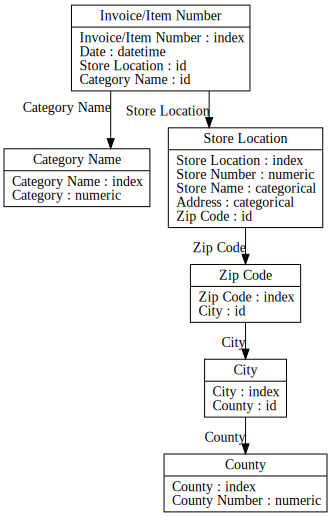

In [7]:
entityset.plot()

Above you can see plotted the entities within entityset, and the relationships between them. Each entity contains the data from the original df with duplication removed. 

In [8]:
entityset

Entityset: liquor orders
  Entities:
    Invoice/Item Number [Rows: 1497599, Columns: 4]
    Category Name [Rows: 73, Columns: 2]
    Store Location [Rows: 1508, Columns: 5]
    Zip Code [Rows: 422, Columns: 2]
    City [Rows: 377, Columns: 2]
    County [Rows: 99, Columns: 2]
  Relationships:
    Invoice/Item Number.Store Location -> Store Location.Store Location
    Invoice/Item Number.Category Name -> Category Name.Category Name
    Store Location.Zip Code -> Zip Code.Zip Code
    Zip Code.City -> City.City
    City.County -> County.County

Looking at the number of rows in each entity, we can see this normalization has allowed for deduplication of data. The autonormalize library accomodates for inaccuracies in data, and only keeps the mode in situations with disrepencies. Also if necessary, autonormalize will create a new index column as a combination of the primary key.